In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("profitable_orders.csv")
df.head()

,order_number,gender,age_group,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,profit
0,5.721630e+12,Female,not specified,0,0,0,0.58,25,10,-78
1,4.965100e+12,Female,not specified,0,0,0,0.32,41,1,2
2,7.182790e+12,Male,not specified,0,0,0,0.39,54,2,17
3,5.708210e+12,Female,not specified,0,0,0,0.45,16,2,-8
4,8.485200e+12,Female,not specified,0,0,0,0.31,14,5,-5


## Mann-Whitney U Test

## Normality

Do men bring more profit than women or non-disclosed gender?


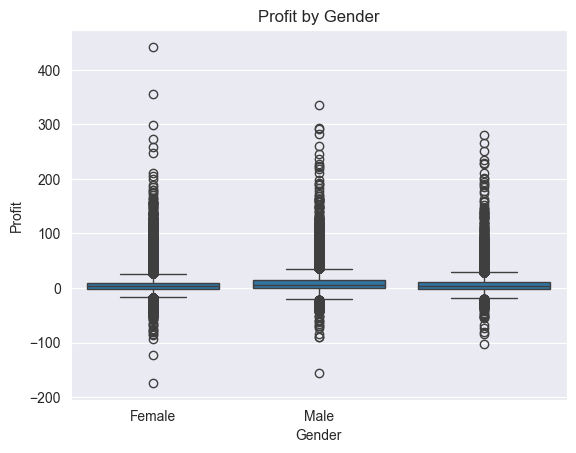

In [3]:
sns.boxplot(x="gender", y="profit", data=df)
plt.title("Profit by Gender")
plt.xlabel("Gender")
plt.ylabel("Profit")
plt.show()

In [4]:
from scipy.stats import shapiro

# Filter profits by gender
profit_male = df[df["gender"] == "Male"]["profit"]
profit_female = df[df["gender"] == "Female"]["profit"]

In [5]:
# count instances of gender
df["gender"].value_counts()

gender
Female    121732
Male       56769
           30370
Name: count, dtype: int64

In [6]:
# Perform the shapiro wilks and interpret the outcome
shapiro_male = shapiro(profit_male)
shapiro_female = shapiro(profit_female)

print(f"The Shapiro-Wilk Test for Males shows a p-value of {round(shapiro_male[1], 3)}")
print(f"The Shapiro-Wilk Test for Females shows a p-value of {round(shapiro_female[1], 3)}")

The Shapiro-Wilk Test for Males shows a p-value of 0.0
The Shapiro-Wilk Test for Females shows a p-value of 0.0


/Users/dylanthunn/.local/share/virtualenvs/statistics-aCBsHkdW/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56769.
  res = hypotest_fun_out(*samples, **kwds)
/Users/dylanthunn/.local/share/virtualenvs/statistics-aCBsHkdW/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 121732.
  res = hypotest_fun_out(*samples, **kwds)


## D'Agostino and Pearson TestD'Agostino and Pearson Test

In [8]:
from scipy.stats import normaltest

In [9]:
# Perform the D'Agostino and Pearson Test
agostino_male = normaltest(profit_male)
agostino_female = normaltest(profit_female)

# Print the p-values
print(f"The D'Agostino and Pearson Test for Males shows a p-value of {round(agostino_male[1], 3)}")
print(f"The D'Agostino and Pearson Test for Females shows a p-value of {round(agostino_female[1], 3)}")

The D'Agostino and Pearson Test for Males shows a p-value of 0.0
The D'Agostino and Pearson Test for Females shows a p-value of 0.0


Since the p-value is very low, the data is considered not normal

## Mann-Whitney U Test

nullhypothesis: There is no difference between the groups

In [10]:
from scipy.stats import mannwhitneyu

# Perform the test
mannwhitney = mannwhitneyu(profit_male, profit_female, alternative = "two-sided")

# Print the p-value and interpret it
print(f"The Mann-Whitney U Test shows a p-value of {round(mannwhitney[1], 3)}")
if mannwhitney[1] < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

The Mann-Whitney U Test shows a p-value of 0.0
Reject the null hypothesis


## ANOVA

## Kruskal-Wallis test

In [11]:
from scipy.stats import kruskal

In [12]:
# Check the age groups
df["age_group"].value_counts()

age_group
not specified    149704
30 - 39 years     19421
20 - 29 years     16692
40 - 49 years     13595
50 - 59 years      6430
60 years           1676
< 20 years         1353
Name: count, dtype: int64

In [13]:
# Calculate the count in each age_group
age_groups = df["age_group"].value_counts()

# Calculate the mean average_item_value for each age_group
mean_age_groups = df.groupby("age_group")["average_item_value"].mean()
mean_age_groups.head()

age_group
20 - 29 years    54.773904
30 - 39 years    54.269090
40 - 49 years    56.161751
50 - 59 years    58.967963
60 years         57.780430
Name: average_item_value, dtype: float64

In [15]:
# create a grouped_data to input for the ANOVA
grouped_data = df.groupby("age_group")["average_item_value"]
grouped_data

In [16]:
for name, group in grouped_data:
    print(f"{name}: {group.mean()}")

20 - 29 years: 54.77390366642703
30 - 39 years: 54.26909016013594
40 - 49 years: 56.16175064361898
50 - 59 years: 58.96796267496112
60 years: 57.78042959427208
< 20 years: 53.252771618625275
not specified: 54.43068989472559


In [17]:
import scipy.stats as st
# Perform anova with the age_group for the average_item_value
st.f_oneway(*[group.values for name, group in grouped_data])
# The above code iterates through the grouped_data object and extract the 'average_item_value' column
# as a NumPy array for each group. This creates a list of arrays,
# each representing a sample for f_oneway.
# The change: Removed ['average_item_value'] since the group object is already a Series containing the 'average_item_value' values.
# .values is then used to get the underlying NumPy array of those values.

F_onewayResult(statistic=np.float64(13.553279681397171), pvalue=np.float64(1.9205359755936803e-15))

In [19]:
# Interpret the pvalue
if st.f_oneway(*[group.values for name, group in grouped_data])[1] < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [20]:
# Perform the D'Agostino and Pearson test for each 'age_group'
# using the 'average_item_value'

for name, group in grouped_data:
    # Apply normaltest to each group's data
    stat, p = normaltest(group.values)
    print(f"The D'Agostino and Pearson Test for {name} shows a p-value of {round(p, 3)}")

The D'Agostino and Pearson Test for 20 - 29 years shows a p-value of 0.0
The D'Agostino and Pearson Test for 30 - 39 years shows a p-value of 0.0
The D'Agostino and Pearson Test for 40 - 49 years shows a p-value of 0.0
The D'Agostino and Pearson Test for 50 - 59 years shows a p-value of 0.0
The D'Agostino and Pearson Test for 60 years shows a p-value of 0.0
The D'Agostino and Pearson Test for < 20 years shows a p-value of 0.0
The D'Agostino and Pearson Test for not specified shows a p-value of 0.0


In [21]:
[group.values for name, group in grouped_data]

[array([ 11,  14,  18, ..., 203, 120,  21], shape=(16692,)),
 array([ 76,  21,  35, ..., 105, 112, 157], shape=(19421,)),
 array([29, 25, 29, ..., 61, 19, 84], shape=(13595,)),
 array([17, 68, 27, ..., 16, 19, 30], shape=(6430,)),
 array([26, 36, 37, ..., 26, 18, 18], shape=(1676,)),
 array([45, 15, 15, ..., 45, 46, 64], shape=(1353,)),
 array([ 25,  41,  54, ...,  28,  36, 161], shape=(149704,))]

In [22]:
# Perform the Kruskal-Wallis test
kruskal = st.kruskal(*[group.values for name, group in grouped_data])

In [23]:
# Interpret the p-value
print(f"The Kruskal-Wallis Test shows a p-value of {round(kruskal[1], 3)}")
if kruskal[1] < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

The Kruskal-Wallis Test shows a p-value of 0.0
Reject the null hypothesis


## Spearman Correlation

In [24]:
# Calculate the spearmanr among 'profit', 'average_item_value',  and items_per_order'
profit_aiv_r = st.spearmanr(df["profit"], df["average_item_value"])
profit_ipo_r = st.spearmanr(df["profit"], df["items_per_order"])
aiv_ipo_r = st.spearmanr(df["average_item_value"], df["items_per_order"])

# Print the correlation, the p-value for all tests
print(f"The correlation between profit and average_item_value is {round(profit_aiv_r[0], 3)} with a p-value of {round(profit_aiv_r[1], 3)}")
print(f"The correlation between profit and items_per_order is {round(profit_ipo_r[0], 3)} with a p-value of {round(profit_ipo_r[1], 3)}")
print(f"The correlation between average_item_value and items_per_order is {round(aiv_ipo_r[0], 3)} with a p-value of {round(aiv_ipo_r[1], 3)}")

The correlation between profit and average_item_value is 0.608 with a p-value of 0.0
The correlation between profit and items_per_order is -0.131 with a p-value of 0.0
The correlation between average_item_value and items_per_order is -0.424 with a p-value of 0.0


In [25]:
# Load the paired data
df_paired = pd.read_csv("lalonde.csv")
df_paired.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [26]:
# Filter data by treatment group
df_treat = df_paired[df_paired["treat"] == 1]
df_control = df_paired[df_paired["treat"] == 0]

<Axes: >

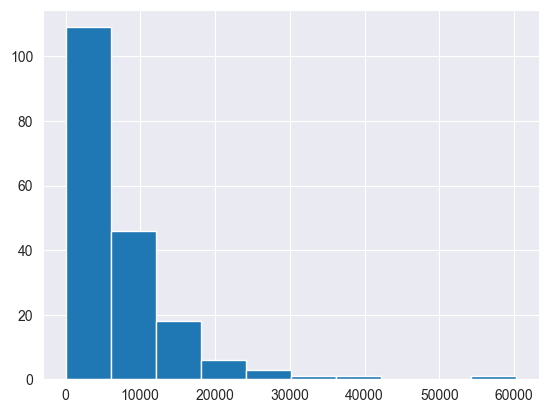

In [27]:
# Data Visualization
df_treat["re78"].hist()

In [28]:
# Perform the Wilcoxon Signed-Rank Test for treat and control
wilcoxon_treat = st.wilcoxon(df_treat["re75"], df_treat["re78"])
wilcoxon_control = st.wilcoxon(df_control["re75"], df_control["re78"])

#Retrieve and interpret the p-value
print(f"The Wilcoxon Signed-Rank Test for treatment shows a p-value of {round(wilcoxon_treat[1], 3)}")
print(f"The Wilcoxon Signed-Rank Test for control shows a p-value of {round(wilcoxon_control[1], 3)}")

The Wilcoxon Signed-Rank Test for treatment shows a p-value of 0.0
The Wilcoxon Signed-Rank Test for control shows a p-value of 0.0
